In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.features.cleaning import clean_data, split_X_and_y_data
from src.utils import get_project_root

/tmp/ipykernel_46890/1396368495.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Pre-processing (TODO: recode tumor size and check for other known descriptors like the MGMT gene and prescence of genetic mutation)

In [3]:
dir_root = get_project_root()
dir_data = 'data'
filename_data_brain = os.path.join(
    dir_root,
    dir_data,
    'survival_brain_2000_to_2020_seer_2022_db.csv'
)
data_raw = pd.read_csv(filename_data_brain)

/tmp/ipykernel_46890/838592508.py:8: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(filename_data_brain)


In [4]:
data = clean_data(data_raw)

In [5]:
# Age groupings according to age standard for survival type II. One typically stratifies on these
# groups or uses the corresponding population weights to perform an age-adjusted analysis.
#
# The groupings were designed so as to minimize the difference between raw and age-standardized
# 5-year survival ratios in the EUROCARE-2 dataset.
#
# Hence, it may be best to use these groupings for our age categorical.
data['Age standard for survival'].value_counts()

Age standard for survival
15    18546
55    17306
65    15350
75    12612
45    12513
Name: count, dtype: int64

In [6]:
# Site recoding for tumors of adolescents and young adults (AYA), ages 15-39
data['AYA site recode 2020 Revision'].value_counts()

AYA site recode 2020 Revision
3.1.2.2 Glioblastoma - invasive                                45457
3.1.4.3 Other astrocytoma/astroglial - invasive                16247
3.1.1.2 Oligodendroglioma - invasive                            7509
3.10.2 Other and unspecified CNS - invasive                     2213
3.1.4.1 Pilocytic astrocytoma                                   1780
3.1.3.2 Ependymoma - invasive                                   1206
3.2 Medulloblastoma and other invasive embryonal CNS tumors     1108
7.3 Germ cell and trophoblastic - CNS                            242
5.2.2 Other                                                      189
3.4.2 Neuronal and mixed neuronal-glial - invasive                86
4.13 Chordoma                                                     73
3.6.2 Choroid plexus - invasive                                   37
3.3.2 Neuroblastoma/ganglioneuroblastoma - invasive               31
4.15 Other soft tissue sarcomas                                   24
4.2 

In [7]:
# Site recoding grouped by major histological categories for brain-specific tumors
data['SEER Brain and CNS Recode'].value_counts()

SEER Brain and CNS Recode
1.1.2 Glioblastoma                                      45457
1.1.1 Diffuse astrocytoma and anaplastic astrocytoma    11688
1.1.4 Oligodendroglioma                                  5442
1.1.9 Glioma, unspecified                                4040
1.6 Other Malignant Brain/ONS                            2831
1.1.6 Other astrocytic tumors                            2128
1.1.5 Oligoastrocytoma                                   1950
1.1.8 Ependymal tumors                                   1203
1.2 Embryonal tumors                                     1134
1.1.10 Other                                              210
1.1.3 Diffuse midline glioma, H3 K27M-mutant               85
1.5 Neuronal and mixed neuronal-glial tumors               81
1.1.7 Astroblastoma                                        41
1.4 Choroid plexus tumors                                  37
Name: count, dtype: int64

In [8]:
# Almost identical conceptually to grade recode
data['CS site-specific factor 1 (2004-2017 varying by schema)'].value_counts()

CS site-specific factor 1 (2004-2017 varying by schema)
040    24422
999    12264
030     6169
020     5754
998     2436
010     1258
Name: count, dtype: int64

In [9]:
data['Grade Recode (thru 2017)'].value_counts()

Grade Recode (thru 2017)
Unknown                                   50140
Undifferentiated; anaplastic; Grade IV    19676
Moderately differentiated; Grade II        3388
Poorly differentiated; Grade III           1999
Well differentiated; Grade I               1124
Name: count, dtype: int64

In [10]:
data['Brain Molecular Markers (2018+)'].value_counts()

Brain Molecular Markers (2018+)
Glioblastoma, IDH-wildtype (9440/3)                                                 6042
Not documented; No microscopic confirmation; Not assessed or unknown if assessed    2587
NA: Histology not 9400/3, 9401/3, 9440/3, 9450/3, 9451/3, 9471/3, 9478/3            1294
Oligodendroglioma, IDH-mutant and 1 p/19q co-deleted (9450/3)                        437
Diffuse astrocytoma, IDH-mutant (9400/3)                                             387
Anaplastic astrocytoma, IDH-mutant (9401/3)                                          376
Anaplastic astrocytoma, IDH-wildtype (9401/3)                                        362
Diffuse astrocytoma, IDH-wildtype (9400/3)                                           242
Anaplastic oligodendroglioma, IDH-mutant and 1 p/19q co-deleted (9451/3)             214
Medulloblastoma, SHH-activated and TP53-wildtype (9471/3)                             42
Test ordered, results not in chart                                            

In [11]:
data['Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+)'].value_counts()

Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+)
Not documented; Cannot be determined; Not assessed or unknown if assessed    34613
Chromosome 19q deletion/LOH not identified/not present                        4517
Chromosome 19q deletion/LOH present                                           2154
Not applicable: Information not collected for this case                       1874
Test ordered, results not in chart                                             126
Name: count, dtype: int64

In [12]:
data['Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+)'].value_counts()

Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+)
Not documented; Cannot be determined; Not assessed or unknown if assessed    34656
Chromosome 1p deletion/LOH not identified/not present                         4458
Chromosome 1p deletion/LOH identified/present                                 2169
Not applicable: Information not collected for this case                       1875
Test ordered, results not in chart                                             126
Name: count, dtype: int64

## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
from sksurv.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest
from scipy import stats

In [14]:
data_train, data_test = train_test_split(
    data,
    test_size=0.2,
    random_state=2984,
    shuffle=True,
    stratify=data['Vital status recode (study cutoff used)']
)

X_train, y_train = split_X_and_y_data(data_train)
X_test, y_test = split_X_and_y_data(data_test)

In [15]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 61061 entries, 36640 to 46191
Data columns (total 128 columns):
 #    Column                                                                 Non-Null Count  Dtype   
---   ------                                                                 --------------  -----   
 0    Sex                                                                    61061 non-null  category
 1    Year of diagnosis                                                      61061 non-null  int64   
 2    PRCDA 2020                                                             61061 non-null  object  
 3    Race recode (W, B, AI, API)                                            61061 non-null  category
 4    Origin recode NHIA (Hispanic, Non-Hisp)                                61061 non-null  category
 5    Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)             61061 non-null  category
 6    TNM 7/CS v0204+ Schema (thru 2017)                                   

In [16]:
X_train['Sex'].value_counts()

Sex
Male      34659
Female    26402
Name: count, dtype: int64

## Model Training

In [17]:
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored

from src.transformers.transformers import DataFrameTransformer

In [71]:
impute_ohe_scale = make_pipeline(
    SimpleImputer(strategy='constant', add_indicator=True).set_output(
        transform="pandas"),
    DataFrameTransformer(),
    OneHotEncoder(),
    StandardScaler()
)
impute_mean_scale = make_pipeline(
    SimpleImputer(strategy='mean', add_indicator=True),
    StandardScaler()
)

column_transformer = make_column_transformer(
    (StandardScaler(), [
        # 'Age recode with <1 year olds',
        'Year of diagnosis',
        'Median household income inflation adj to 2021 (thousands USD)',
        'Total number of in situ/malignant tumors for patient',  # should we restrict the cohort to N=1?
        'Combined Tumor Size',
        'No tumor found',
        'Unknown tumor size',
    ]),
    (impute_ohe_scale, [
        'Age standard for survival',  # handle standardized age groupings categorically
        'Sex',
        'Race recode (W, B, AI, API)',
        'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
        'Marital status at diagnosis',
        # 'AYA site recode 2020 Revision',
        'SEER Brain and CNS Recode',
        'Primary Site - labeled',
        'Histologic Type ICD-O-3',
        'Grade Recode (thru 2017)',
        'Diagnostic Confirmation',
        'Histology recode - broad groupings',
        # 'SEER Combined Summary Stage 2000 (2004-2017)',
        'Chromosome 19q: Loss of Heterozygosity (LOH) Recode (2010+)',
        'Chromosome 1p: Loss of Heterozygosity (LOH) Recode (2010+)',
        'Brain Molecular Markers (2018+)',
    ]),
    (impute_mean_scale, [
        'Months from diagnosis to treatment',
    ]),
    # (, ['']),
    remainder='drop',
    n_jobs=-1,
)

In [72]:
ct = column_transformer.fit(X_train)
feature_names = ct.get_feature_names_out()
feature_names

array(['standardscaler__Year of diagnosis',
       'standardscaler__Median household income inflation adj to 2021 (thousands USD)',
       'standardscaler__Total number of in situ/malignant tumors for patient',
       'standardscaler__Combined Tumor Size',
       'standardscaler__No tumor found',
       'standardscaler__Unknown tumor size',
       'pipeline-1__Age standard for survival=45',
       'pipeline-1__Age standard for survival=55',
       'pipeline-1__Age standard for survival=65',
       'pipeline-1__Age standard for survival=75', 'pipeline-1__Sex=Male',
       'pipeline-1__Race recode (W, B, AI, API)=Asian or Pacific Islander',
       'pipeline-1__Race recode (W, B, AI, API)=Black',
       'pipeline-1__Race recode (W, B, AI, API)=Unknown',
       'pipeline-1__Race recode (W, B, AI, API)=White',
       'pipeline-1__Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)=Non-Hispanic American Indian/Alaska Native',
       'pipeline-1__Race and origin recode (NHW, NHB, NHAIA

In [73]:
pipeline = make_pipeline(
    column_transformer,
    CoxnetSurvivalAnalysis(verbose=True, fit_baseline_model=False)
)

In [74]:
pipeline.fit(X_train, y_train.to_records(index=False))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Year of diagnosis',
                                                   'Median household income '
                                                   'inflation adj to 2021 '
                                                   '(thousands USD)',
                                                   'Total number of in '
                                                   'situ/malignant tumors for '
                                                   'patient',
                                                   'Combined Tumor Size',
                                                   'No tumor found',
                                                   'Unknown tumor size']),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   Si...
                                                   'Heterozygosity (LOH) '
                                                   'Recode (2010+)',
                                                   'Chromosome 1p: Loss of '
                                                   'Heterozygosity (LOH) '
                                                   'Recode (2010+)',
                                                   'Brain Molecular Markers '
                                                   '(2018+)']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Months from diagnosis to '
                                                   'treatment'])])),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(verbose=True))])

In [75]:
X_transformed = column_transformer.fit_transform(X_train)
X_transformed

array([[ 0.40049512, -1.36485533, -0.15788384, ...,  0.43276706,
        -0.42146307, -0.42691093],
       [ 1.07362015, -1.36485533, -0.15788384, ...,  0.43276706,
        -0.42146307, -0.42691093],
       [-0.27262991, -1.36485533, -0.15788384, ...,  0.43276706,
         1.43958292, -0.42691093],
       ...,
       [ 0.90533889, -0.92908403, -0.15788384, ...,  0.43276706,
         2.37010592, -0.42691093],
       [ 0.23221386,  0.81400118, -0.15788384, ...,  0.43276706,
        -0.42146307, -0.42691093],
       [-0.27262991, -1.36485533, -0.15788384, ...,  0.43276706,
        -0.42146307, -0.42691093]])

In [76]:
pipeline.score(X_train, y_train.to_records(index=False))

0.7760636962367231

In [77]:
coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.8, verbose=True, fit_baseline_model=False)
coxnet.fit(X_transformed, y_train.to_records(index=False))
coxnet.score(X_transformed, y_train.to_records(index=False))

0.7760598085921208

In [78]:
def build_2D_gridsearch(pipeline, cv, l1_ratios, alphas):
    # argument alphas of CoxnetSurvivalAnalysis must be an array at each grid point
    wrapped_alphas = [[alpha] for alpha in alphas]
    cv_search_dist = {
        'l1_ratio': l1_ratios,
        'alphas': wrapped_alphas,
    }
    cv_search = GridSearchCV(
        pipeline,
        cv_search_dist,
        cv=cv,
        error_score=0.5,  # replaces fit errors with random models
        n_jobs=-1,
        verbose=4,
    )
    return cv_search

In [184]:
# Grid search hyperparameters
n_splits = 3
l1_ratios = np.linspace(0.1, 0.9, 8)
alphas = 10.0 ** np.linspace(-4, 1, 8)

In [185]:
# Make the K-fold split deterministic for now
cv = KFold(n_splits=n_splits, shuffle=True, random_state=2984)

# Build the grid search metaestimator
coxnet = CoxnetSurvivalAnalysis(verbose=True, fit_baseline_model=False)
cv_search = build_2D_gridsearch(coxnet, cv, l1_ratios, alphas)

In [186]:
cv_search.fit(X_transformed, y_train.to_records(index=False))

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 2/3] END alphas=[0.0001], l1_ratio=0.2142857142857143;, score=0.776 total time=   7.0s
[CV 2/3] END alphas=[0.0001], l1_ratio=0.5571428571428572;, score=0.776 total time=   7.3s
[CV 2/3] END .....alphas=[0.0001], l1_ratio=0.1;, score=0.776 total time=   7.4s
[CV 3/3] END alphas=[0.0001], l1_ratio=0.5571428571428572;, score=0.776 total time=   7.7s
[CV 2/3] END alphas=[0.0001], l1_ratio=0.44285714285714284;, score=0.776 total time=   8.1s
[CV 2/3] END alphas=[0.0001], l1_ratio=0.3285714285714286;, score=0.776 total time=   8.3s


max update after 193 iterations increased from 0.132401 to 0.133247
max update after 194 iterations increased from 0.133247 to 0.138434
max update after 195 iterations increased from 0.138434 to 0.143434
max update after 196 iterations increased from 0.143434 to 0.148239
max update after 197 iterations increased from 0.148239 to 0.152845
max update after 198 iterations increased from 0.152845 to 0.157247
max update after 199 iterations increased from 0.157247 to 0.161442
max update after 200 iterations increased from 0.161442 to 0.165426
max update after 201 iterations increased from 0.165426 to 0.169198
max update after 202 iterations increased from 0.169198 to 0.172757
max update after 203 iterations increased from 0.172757 to 0.176104
max update after 204 iterations increased from 0.176104 to 0.179237
max update after 205 iterations increased from 0.179237 to 0.18216
max update after 206 iterations increased from 0.18216 to 0.184873
max update after 207 iterations increased from 0.1

[CV 2/3] END alphas=[0.0001], l1_ratio=0.6714285714285715;, score=0.776 total time=   7.6s
[CV 3/3] END alphas=[0.0001], l1_ratio=0.6714285714285715;, score=0.776 total time=   7.5s
[CV 2/3] END alphas=[0.0001], l1_ratio=0.7857142857142857;, score=0.776 total time=   7.6s
[CV 3/3] END alphas=[0.0001], l1_ratio=0.7857142857142857;, score=0.776 total time=   7.3s
[CV 1/3] END .....alphas=[0.0001], l1_ratio=0.9;, score=0.774 total time=   7.1s
[CV 1/3] END alphas=[0.0001], l1_ratio=0.7857142857142857;, score=0.774 total time=   9.2s
[CV 2/3] END .....alphas=[0.0001], l1_ratio=0.9;, score=0.776 total time=   7.6s
[CV 2/3] END alphas=[0.0005179474679231213], l1_ratio=0.1;, score=0.776 total time=   7.6s
[CV 3/3] END .....alphas=[0.0001], l1_ratio=0.9;, score=0.776 total time=   8.8s
[CV 3/3] END alphas=[0.0005179474679231213], l1_ratio=0.1;, score=0.776 total time=   8.6s
[CV 1/3] END alphas=[0.0005179474679231213], l1_ratio=0.2142857142857143;, score=0.774 total time=   8.4s
[CV 1/3] END a

max update after 15 iterations increased from 0.000142399 to 0.000263495


[CV 3/3] END alphas=[0.013894954943731374], l1_ratio=0.7857142857142857;, score=0.772 total time=   5.5s


max update after 12 iterations increased from 0.000151354 to 0.000256314


[CV 1/3] END alphas=[0.013894954943731374], l1_ratio=0.9;, score=0.768 total time=   5.1s
[CV 2/3] END alphas=[0.013894954943731374], l1_ratio=0.9;, score=0.771 total time=   5.4s
[CV 3/3] END alphas=[0.013894954943731374], l1_ratio=0.9;, score=0.771 total time=   4.8s
[CV 1/3] END alphas=[0.07196856730011521], l1_ratio=0.1;, score=0.767 total time=   5.5s
[CV 2/3] END alphas=[0.07196856730011521], l1_ratio=0.1;, score=0.770 total time=   5.3s
[CV 3/3] END alphas=[0.07196856730011521], l1_ratio=0.1;, score=0.770 total time=   4.6s
[CV 2/3] END alphas=[0.07196856730011521], l1_ratio=0.2142857142857143;, score=0.768 total time=   4.4s
[CV 1/3] END alphas=[0.07196856730011521], l1_ratio=0.2142857142857143;, score=0.764 total time=   5.5s
[CV 3/3] END alphas=[0.002682695795279727], l1_ratio=0.7857142857142857;, score=0.500 total time=  54.7s
[CV 3/3] END alphas=[0.07196856730011521], l1_ratio=0.2142857142857143;, score=0.768 total time=   4.7s
[CV 1/3] END alphas=[0.07196856730011521], l1_

/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END alphas=[1.9306977288832496], l1_ratio=0.2142857142857143;, score=0.627 total time=   3.8s
[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.2142857142857143;, score=0.625 total time=   3.7s
[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.1;, score=0.677 total time=   5.4s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END alphas=[1.9306977288832496], l1_ratio=0.3285714285714286;, score=0.500 total time=   3.0s
[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.3285714285714286;, score=0.500 total time=   3.1s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END alphas=[1.9306977288832496], l1_ratio=0.2142857142857143;, score=0.627 total time=   4.5s
[CV 3/3] END alphas=[1.9306977288832496], l1_ratio=0.3285714285714286;, score=0.500 total time=   2.9s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END alphas=[1.9306977288832496], l1_ratio=0.44285714285714284;, score=0.500 total time=   3.1s
[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.44285714285714284;, score=0.500 total time=   3.0s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END alphas=[1.9306977288832496], l1_ratio=0.44285714285714284;, score=0.500 total time=   3.0s
[CV 1/3] END alphas=[1.9306977288832496], l1_ratio=0.5571428571428572;, score=0.500 total time=   2.8s
[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.5571428571428572;, score=0.500 total time=   2.6s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END alphas=[1.9306977288832496], l1_ratio=0.5571428571428572;, score=0.500 total time=   3.1s
[CV 1/3] END alphas=[1.9306977288832496], l1_ratio=0.6714285714285715;, score=0.500 total time=   2.9s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.6714285714285715;, score=0.500 total time=   3.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END alphas=[1.9306977288832496], l1_ratio=0.6714285714285715;, score=0.500 total time=   2.9s
[CV 1/3] END alphas=[1.9306977288832496], l1_ratio=0.7857142857142857;, score=0.500 total time=   3.0s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.7857142857142857;, score=0.500 total time=   3.2s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END alphas=[1.9306977288832496], l1_ratio=0.7857142857142857;, score=0.500 total time=   3.3s
[CV 1/3] END alphas=[1.9306977288832496], l1_ratio=0.9;, score=0.500 total time=   3.4s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END alphas=[1.9306977288832496], l1_ratio=0.9;, score=0.500 total time=   3.3s
[CV 3/3] END alphas=[1.9306977288832496], l1_ratio=0.9;, score=0.500 total time=   2.8s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .......alphas=[10.0], l1_ratio=0.1;, score=0.500 total time=   3.0s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .......alphas=[10.0], l1_ratio=0.1;, score=0.500 total time=   3.2s
[CV 3/3] END .......alphas=[10.0], l1_ratio=0.1;, score=0.500 total time=   2.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END alphas=[10.0], l1_ratio=0.2142857142857143;, score=0.500 total time=   3.0s
[CV 3/3] END alphas=[10.0], l1_ratio=0.2142857142857143;, score=0.500 total time=   2.3s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END alphas=[10.0], l1_ratio=0.2142857142857143;, score=0.500 total time=   3.0s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END alphas=[10.0], l1_ratio=0.3285714285714286;, score=0.500 total time=   3.4s
[CV 3/3] END alphas=[10.0], l1_ratio=0.3285714285714286;, score=0.500 total time=   2.9s
[CV 1/3] END alphas=[10.0], l1_ratio=0.44285714285714284;, score=0.500 total time=   2.3s
[CV 2/3] END alphas=[10.0], l1_ratio=0.3285714285714286;, score=0.500 total time=   3.1s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END alphas=[10.0], l1_ratio=0.44285714285714284;, score=0.500 total time=   2.4s
[CV 2/3] END alphas=[10.0], l1_ratio=0.44285714285714284;, score=0.500 total time=   3.1s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END alphas=[10.0], l1_ratio=0.5571428571428572;, score=0.500 total time=   2.7s
[CV 2/3] END alphas=[10.0], l1_ratio=0.5571428571428572;, score=0.500 total time=   3.0s
[CV 1/3] END alphas=[10.0], l1_ratio=0.5571428571428572;, score=0.500 total time=   3.5s
[CV 1/3] END alphas=[10.0], l1_ratio=0.6714285714285715;, score=0.500 total time=   3.2s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END alphas=[10.0], l1_ratio=0.6714285714285715;, score=0.500 total time=   3.0s
[CV 3/3] END alphas=[10.0], l1_ratio=0.6714285714285715;, score=0.500 total time=   2.8s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END alphas=[10.0], l1_ratio=0.7857142857142857;, score=0.500 total time=   2.4s
[CV 2/3] END alphas=[10.0], l1_ratio=0.7857142857142857;, score=0.500 total time=   2.5s
[CV 3/3] END .......alphas=[10.0], l1_ratio=0.9;, score=0.500 total time=   2.2s
[CV 2/3] END .......alphas=[10.0], l1_ratio=0.9;, score=0.500 total time=   2.5s
[CV 1/3] END .......alphas=[10.0], l1_ratio=0.9;, score=0.500 total time=   3.1s
[CV 3/3] END alphas=[10.0], l1_ratio=0.7857142857142857;, score=0.500 total time=   3.6s
[CV 3/3] END .....alphas=[0.0001], l1_ratio=0.1;, score=0.500 total time= 8.8min
[CV 1/3] END .....alphas=[0.0001], l1_ratio=0.1;, score=0.500 total time= 8.8min
[CV 3/3] END alphas=[0.0001], l1_ratio=0.2142857142857143;, score=0.500 total time= 9.6min
[CV 1/3] END alphas=[0.0001], l1_ratio=0.2142857142857143;, score=0.500 total time= 9.8min
[CV 3/3] END alphas=[0.0001], l1_ratio=0.3285714285714286;, score=0.500 total time=10.4min
[CV 1/3] END alphas=[0.0001], l1_ratio=0.32857142857142

/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to 0.5.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sksurv/linear_model/coxnet.py", line 269, in fit
    coef, alphas, deviance_ratio, n_iter = call_fit_coxnet(
                                           ^^^^^^^^^^^^^^^^
  

GridSearchCV(cv=KFold(n_splits=3, random_state=2984, shuffle=True),
             error_score=0.5, estimator=CoxnetSurvivalAnalysis(verbose=True),
             n_jobs=-1,
             param_grid={'alphas': [[0.0001], [0.0005179474679231213],
                                    [0.002682695795279727],
                                    [0.013894954943731374],
                                    [0.07196856730011521], [0.3727593720314942],
                                    [1.9306977288832496], [10.0]],
                         'l1_ratio': array([0.1       , 0.21428571, 0.32857143, 0.44285714, 0.55714286,
       0.67142857, 0.78571429, 0.9       ])},
             verbose=4)

In [193]:
cv_results = pd.DataFrame(cv_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alphas,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,353.841061,246.436807,0.680994,0.963071,[0.0001],0.1,"{'alphas': [0.0001], 'l1_ratio': 0.1}",0.5,0.775569,0.500000,0.591856,0.129905,48
1,390.309530,272.618272,0.726023,1.026752,[0.0001],0.214286,"{'alphas': [0.0001], 'l1_ratio': 0.21428571428...",0.5,0.775557,0.500000,0.591852,0.129899,50
2,416.854028,290.918832,0.953015,1.347766,[0.0001],0.328571,"{'alphas': [0.0001], 'l1_ratio': 0.32857142857...",0.5,0.775565,0.500000,0.591855,0.129903,49
3,502.883575,356.355723,0.958767,1.355901,[0.0001],0.442857,"{'alphas': [0.0001], 'l1_ratio': 0.44285714285...",0.5,0.775574,0.500000,0.591858,0.129907,47
4,254.420353,352.156656,1.382672,0.981100,[0.0001],0.557143,"{'alphas': [0.0001], 'l1_ratio': 0.55714285714...",0.5,0.775581,0.775691,0.683757,0.129936,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.586593,0.036928,2.016665,0.345516,[10.0],0.442857,"{'alphas': [10.0], 'l1_ratio': 0.4428571428571...",0.5,0.500000,0.500000,0.500000,0.000000,51
60,0.733246,0.067172,2.352359,0.338337,[10.0],0.557143,"{'alphas': [10.0], 'l1_ratio': 0.5571428571428...",0.5,0.500000,0.500000,0.500000,0.000000,51
61,0.688547,0.028500,2.293628,0.146679,[10.0],0.671429,"{'alphas': [10.0], 'l1_ratio': 0.6714285714285...",0.5,0.500000,0.500000,0.500000,0.000000,51
62,0.663226,0.152389,2.201600,0.410486,[10.0],0.785714,"{'alphas': [10.0], 'l1_ratio': 0.7857142857142...",0.5,0.500000,0.500000,0.500000,0.000000,51


In [194]:
cv_search.best_params_

{'alphas': [0.0005179474679231213], 'l1_ratio': 0.7857142857142857}

In [195]:
cv_results.param_alphas

0     [0.0001]
1     [0.0001]
2     [0.0001]
3     [0.0001]
4     [0.0001]
        ...   
59      [10.0]
60      [10.0]
61      [10.0]
62      [10.0]
63      [10.0]
Name: param_alphas, Length: 64, dtype: object

In [196]:
cv_results.mean_test_score

0     0.591856
1     0.591852
2     0.591855
3     0.591858
4     0.683757
        ...   
59    0.500000
60    0.500000
61    0.500000
62    0.500000
63    0.500000
Name: mean_test_score, Length: 64, dtype: float64

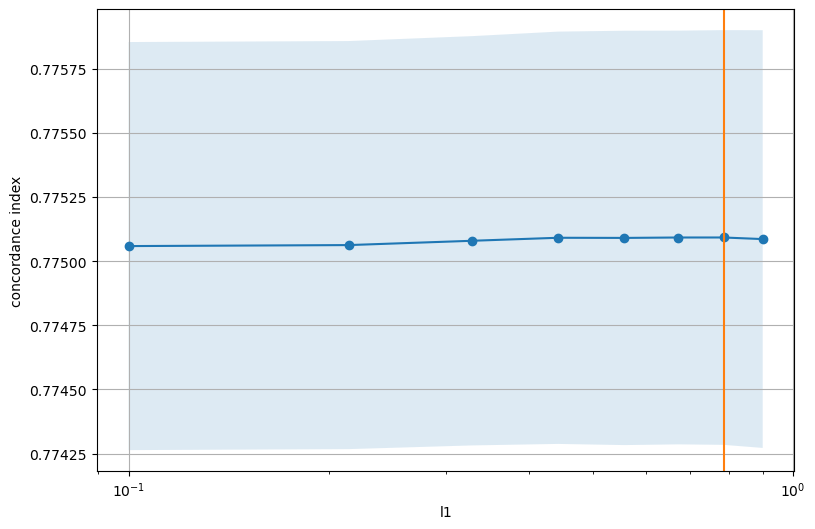

In [197]:
l1s = []
mean = []
std = []
for i, alphas in enumerate(cv_results.param_alphas):
    if alphas != cv_search.best_params_["alphas"]:
        continue
    l1s.append(cv_results.param_l1_ratio[i])
    mean.append(cv_results.mean_test_score[i])
    std.append(cv_results.std_test_score[i])

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(l1s, mean, 'o-')
ax.fill_between(l1s, np.asarray(mean) - np.asarray(std), np.asarray(mean) + np.asarray(std), alpha=0.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("l1")
ax.axvline(cv_search.best_params_["l1_ratio"], c="C1")
# ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

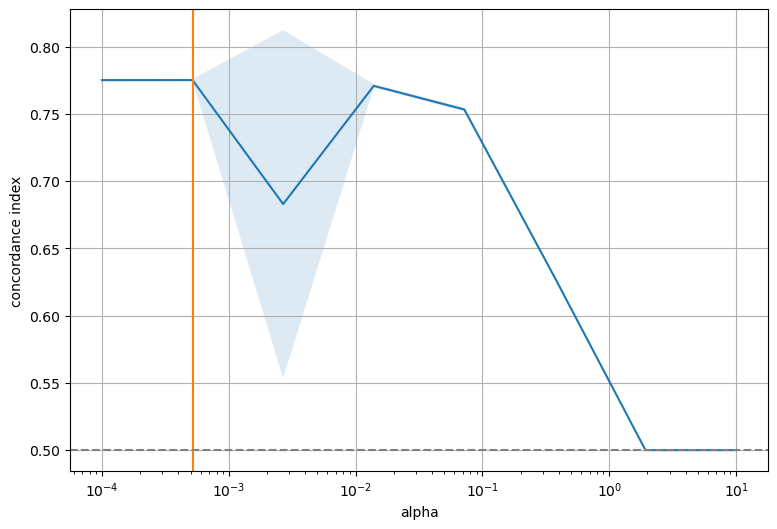

In [198]:
alphas = []
mean = []
std = []
for i, l1_ratio in enumerate(cv_results.param_l1_ratio):
    if l1_ratio != cv_search.best_params_["l1_ratio"]:
        continue
    alphas.append(cv_results.param_alphas[i][0])
    mean.append(cv_results.mean_test_score[i])
    std.append(cv_results.std_test_score[i])

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, np.asarray(mean) - np.asarray(std),
                np.asarray(mean) + np.asarray(std), alpha=0.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(cv_search.best_params_["alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

In [200]:
def build_1D_gridsearch(pipeline, cv, alphas):
    # argument alphas of CoxnetSurvivalAnalysis must be an array at each grid point
    wrapped_alphas = [[alpha] for alpha in alphas]
    cv_search_dist = {'alphas': wrapped_alphas}
    cv_search_1D = GridSearchCV(
        pipeline,
        cv_search_dist,
        cv=cv,
        error_score=0.5,  # replaces fit errors with random models
        n_jobs=-1,
        verbose=4,
    )
    return cv_search_1D

In [201]:
# Grid search hyperparameters
n_splits = 3
# log10_best_alpha = np.log10(cv_search.best_params_["alphas"])
# log10_best_alpha = np.log10(0.00035938136638046257)
alphas = 10.0 ** np.linspace(-4, 2, 50)
alphas

array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
       3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
       9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
       2.94705170e-03, 3.90693994e-03, 5.17947468e-03, 6.86648845e-03,
       9.10298178e-03, 1.20679264e-02, 1.59985872e-02, 2.12095089e-02,
       2.81176870e-02, 3.72759372e-02, 4.94171336e-02, 6.55128557e-02,
       8.68511374e-02, 1.15139540e-01, 1.52641797e-01, 2.02358965e-01,
       2.68269580e-01, 3.55648031e-01, 4.71486636e-01, 6.25055193e-01,
       8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
       2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
       7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
       2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
       7.54312006e+01, 1.00000000e+02])

In [202]:
cv_search.best_params_["l1_ratio"]

0.7857142857142857

In [203]:
# Make the K-fold split deterministic for now
cv = KFold(n_splits=n_splits, shuffle=True, random_state=2984)

# Build the grid search metaestimator
best_l1_ratio = cv_search.best_params_["l1_ratio"]
# best_l1_ratio = 0.78
coxnet = CoxnetSurvivalAnalysis(
    l1_ratio=best_l1_ratio, verbose=True, fit_baseline_model=False)
    # l1_ratio=0.01, verbose=True, fit_baseline_model=False)
cv_search_1D = build_1D_gridsearch(coxnet, cv, alphas)

In [204]:
cv_search_1D.fit(X_transformed, y_train.to_records(index=False))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[CV 1/3] END ...................alphas=[0.0001];, score=0.774 total time=   7.9s
[CV 1/3] END ...alphas=[0.00023299518105153718];, score=0.774 total time=   7.3s
[CV 2/3] END ...................alphas=[0.0001];, score=0.776 total time=   7.5s
[CV 3/3] END ...alphas=[0.00023299518105153718];, score=0.776 total time=   7.4s
[CV 2/3] END ...alphas=[0.00023299518105153718];, score=0.776 total time=   7.6s
[CV 3/3] END ...alphas=[0.00013257113655901095];, score=0.776 total time=   7.7s
[CV 2/3] END ...alphas=[0.00013257113655901095];, score=0.776 total time=   7.7s
[CV 3/3] END ...................alphas=[0.0001];, score=0.776 total time=   7.9s
[CV 2/3] END ...alphas=[0.00017575106248547912];, score=0.776 total time=   7.5s
[CV 1/3] END ...alphas=[0.00017575106248547912];, score=0.774 total time=   7.9s
[CV 3/3] END ...alphas=[0.00030888435964774815];, score=0.776 total time=   8.0s
[CV 1/3] END ...alphas=[0.00013257113655901095];, score=0.774 total time=   8.1s
[CV 3/3] END ...alphas=[0.00

/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ......alphas=[0.20235896477251575];, score=0.697 total time=   2.2s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ......alphas=[0.20235896477251575];, score=0.699 total time=   2.3s
[CV 2/3] END ......alphas=[0.20235896477251575];, score=0.698 total time=   2.4s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .......alphas=[0.2682695795279725];, score=0.673 total time=   2.4s
[CV 1/3] END .......alphas=[0.2682695795279725];, score=0.673 total time=   2.6s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ......alphas=[0.35564803062231287];, score=0.628 total time=   2.3s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .......alphas=[0.2682695795279725];, score=0.676 total time=   2.7s
[CV 2/3] END .......alphas=[0.6250551925273969];, score=0.500 total time=   1.6s
[CV 1/3] END .......alphas=[0.6250551925273969];, score=0.500 total time=   1.7s
[CV 2/3] END ......alphas=[0.35564803062231287];, score=0.627 total time=   2.6s
[CV 1/3] END ......alphas=[0.47148663634573945];, score=0.627 total time=   2.5s
[CV 3/3] END ......alphas=[0.47148663634573945];, score=0.627 total time=   2.3s
[CV 3/3] END ......alphas=[0.35564803062231287];, score=0.629 total time=   2.7s
[CV 3/3] END .......alphas=[0.6250551925273969];, score=0.500 total time=   1.6s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/skle

[CV 1/3] END .......alphas=[0.8286427728546842];, score=0.500 total time=   1.6s
[CV 2/3] END ......alphas=[0.47148663634573945];, score=0.625 total time=   2.8s
[CV 2/3] END .......alphas=[0.8286427728546842];, score=0.500 total time=   1.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .......alphas=[0.8286427728546842];, score=0.500 total time=   1.7s
[CV 1/3] END .......alphas=[1.0985411419875573];, score=0.500 total time=   1.8s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .......alphas=[1.0985411419875573];, score=0.500 total time=   1.6s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .......alphas=[1.4563484775012443];, score=0.500 total time=   1.7s
[CV 2/3] END .......alphas=[1.4563484775012443];, score=0.500 total time=   1.7s
[CV 3/3] END .......alphas=[1.0985411419875573];, score=0.500 total time=   1.8s
[CV 2/3] END .......alphas=[1.9306977288832496];, score=0.500 total time=   1.7s
[CV 1/3] END .......alphas=[1.9306977288832496];, score=0.500 total time=   1.8s
[CV 3/3] END .......alphas=[1.4563484775012443];, score=0.500 total time=   1.9s
[CV 1/3] END ........alphas=[2.559547922699533];, score=0.500 total time=   1.8s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/skle

[CV 2/3] END ........alphas=[2.559547922699533];, score=0.500 total time=   1.7s
[CV 1/3] END .........alphas=[3.39322177189533];, score=0.500 total time=   1.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .........alphas=[3.39322177189533];, score=0.500 total time=   1.7s
[CV 3/3] END .......alphas=[1.9306977288832496];, score=0.500 total time=   2.4s
[CV 3/3] END ........alphas=[2.559547922699533];, score=0.500 total time=   2.1s
[CV 1/3] END ........alphas=[4.498432668969444];, score=0.500 total time=   1.6s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .........alphas=[3.39322177189533];, score=0.500 total time=   1.8s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ........alphas=[4.498432668969444];, score=0.500 total time=   1.7s
[CV 3/3] END ........alphas=[4.498432668969444];, score=0.500 total time=   1.7s
[CV 1/3] END ........alphas=[5.963623316594637];, score=0.500 total time=   1.9s
[CV 2/3] END ........alphas=[5.963623316594637];, score=0.500 total time=   1.7s
[CV 2/3] END .......alphas=[7.9060432109077015];, score=0.500 total time=   1.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .......alphas=[7.9060432109077015];, score=0.500 total time=   1.8s
[CV 3/3] END ........alphas=[5.963623316594637];, score=0.500 total time=   2.0s
[CV 3/3] END .......alphas=[7.9060432109077015];, score=0.500 total time=   1.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ....alphas=[0.0029470517025518097];, score=0.500 total time=  19.3s
[CV 2/3] END .......alphas=[10.481131341546853];, score=0.500 total time=   1.6s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/skle

[CV 1/3] END .......alphas=[10.481131341546853];, score=0.500 total time=   1.9s
[CV 2/3] END ........alphas=[13.89495494373136];, score=0.500 total time=   1.7s
[CV 1/3] END ........alphas=[13.89495494373136];, score=0.500 total time=   1.8s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ........alphas=[13.89495494373136];, score=0.500 total time=   1.9s
[CV 3/3] END .......alphas=[10.481131341546853];, score=0.500 total time=   2.1s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .......alphas=[18.420699693267164];, score=0.500 total time=   1.6s
[CV 1/3] END .......alphas=[18.420699693267164];, score=0.500 total time=   1.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .......alphas=[18.420699693267164];, score=0.500 total time=   1.7s
[CV 1/3] END .......alphas=[24.420530945486497];, score=0.500 total time=   1.7s
[CV 2/3] END .......alphas=[24.420530945486497];, score=0.500 total time=   1.7s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .........alphas=[32.3745754281764];, score=0.500 total time=   1.8s
[CV 2/3] END .........alphas=[32.3745754281764];, score=0.500 total time=   1.8s
[CV 3/3] END .........alphas=[32.3745754281764];, score=0.500 total time=   1.7s
[CV 3/3] END .......alphas=[24.420530945486497];, score=0.500 total time=   2.0s


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:732: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ........alphas=[42.91934260128778];, score=0.500 total time=   1.8s
[CV 2/3] END ........alphas=[42.91934260128778];, score=0.500 total time=   1.7s
[CV 3/3] END ........alphas=[42.91934260128778];, score=0.500 total time=   1.7s
[CV 2/3] END ........alphas=[56.89866029018293];, score=0.500 total time=   1.5s
[CV 1/3] END ........alphas=[56.89866029018293];, score=0.500 total time=   1.7s
[CV 3/3] END ........alphas=[56.89866029018293];, score=0.500 total time=   1.6s
[CV 1/3] END ........alphas=[75.43120063354607];, score=0.500 total time=   1.4s
[CV 2/3] END ........alphas=[75.43120063354607];, score=0.500 total time=   1.4s
[CV 2/3] END ....................alphas=[100.0];, score=0.500 total time=   1.1s
[CV 3/3] END ........alphas=[75.43120063354607];, score=0.500 total time=   1.3s
[CV 1/3] END ....................alphas=[100.0];, score=0.500 total time=   1.3s
[CV 3/3] END ....................alphas=[100.0];, score=0.500 total time=   1.1s


max update after 14016 iterations increased from 0.0777295 to 0.0780815
max update after 14028 iterations increased from 0.073161 to 0.0735979


[CV 1/3] END .....alphas=[0.003906939937054617];, score=0.500 total time= 1.9min


/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to 0.5.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/daniel/miniconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sksurv/linear_model/coxnet.py", line 269, in fit
    coef, alphas, deviance_ratio, n_iter = call_fit_coxnet(
                                           ^^^^^^^^^^^^^^^^
  Fi

GridSearchCV(cv=KFold(n_splits=3, random_state=2984, shuffle=True),
             error_score=0.5,
             estimator=CoxnetSurvivalAnalysis(l1_ratio=0.7857142857142857,
                                              verbose=True),
             n_jobs=-1,
             param_grid={'alphas': [[0.0001], [0.00013257113655901095],
                                    [0.00017575106248547912],
                                    [0.00023299518105153718],
                                    [0.00030888435964774815],
                                    [0.00040949150623804275],
                                    [0.0005428675439323859],
                                    [0.0...
                                    [0.005179474679231213],
                                    [0.006866488450042998],
                                    [0.009102981779915217],
                                    [0.012067926406393288],
                                    [0.015998587196060572],
                                    [0.021209508879201904],
                                    [0.028117686979742307],
                                    [0.03727593720314938],
                                    [0.04941713361323833], [0.0655128556859551],
                                    [0.08685113737513521], [0.1151395399326447],
                                    [0.15264179671752334],
                                    [0.20235896477251575], [0.2682695795279725],
                                    [0.35564803062231287], ...]},
             verbose=4)

In [205]:
cv_results_1D = pd.DataFrame(cv_search_1D.cv_results_)
cv_results_1D

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alphas,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.452450,0.597845,2.312559,0.572558,[0.0001],{'alphas': [0.0001]},0.773947,0.775593,0.775681,0.775074,0.000797,8
1,5.965105,0.244825,1.873502,0.134696,[0.00013257113655901095],{'alphas': [0.00013257113655901095]},0.773954,0.775603,0.775678,0.775078,0.000796,6
2,5.958953,0.127261,1.770200,0.050313,[0.00017575106248547912],{'alphas': [0.00017575106248547912]},0.773954,0.775612,0.775674,0.775080,0.000797,5
3,5.574986,0.264520,1.874666,0.148934,[0.00023299518105153718],{'alphas': [0.00023299518105153718]},0.773961,0.775644,0.775664,0.775090,0.000798,4
4,6.655989,0.484516,2.016157,0.218957,[0.00030888435964774815],{'alphas': [0.00030888435964774815]},0.773957,0.775663,0.775676,0.775099,0.000807,1
5,5.308935,0.902188,2.505642,0.480449,[0.00040949150623804275],{'alphas': [0.00040949150623804275]},0.773950,0.775679,0.775655,0.775095,0.000809,2
6,5.807908,0.206846,1.950917,0.056700,[0.0005428675439323859],{'alphas': [0.0005428675439323859]},0.773945,0.775704,0.775623,0.775090,0.000811,3
7,5.842382,0.228820,1.831195,0.082667,[0.0007196856730011522],{'alphas': [0.0007196856730011522]},0.773902,0.775728,0.775597,0.775076,0.000832,7
8,6.088557,0.106790,1.862361,0.152870,[0.0009540954763499944],{'alphas': [0.0009540954763499944]},0.773832,0.775733,0.775579,0.775048,0.000862,9
9,5.916750,0.266988,2.125316,0.122926,[0.0012648552168552957],{'alphas': [0.0012648552168552957]},0.773751,0.775715,0.775537,0.775001,0.000887,10


In [206]:
cv_search_1D.best_params_

{'alphas': [0.00030888435964774815]}

Number of non-zero coefficients: 190


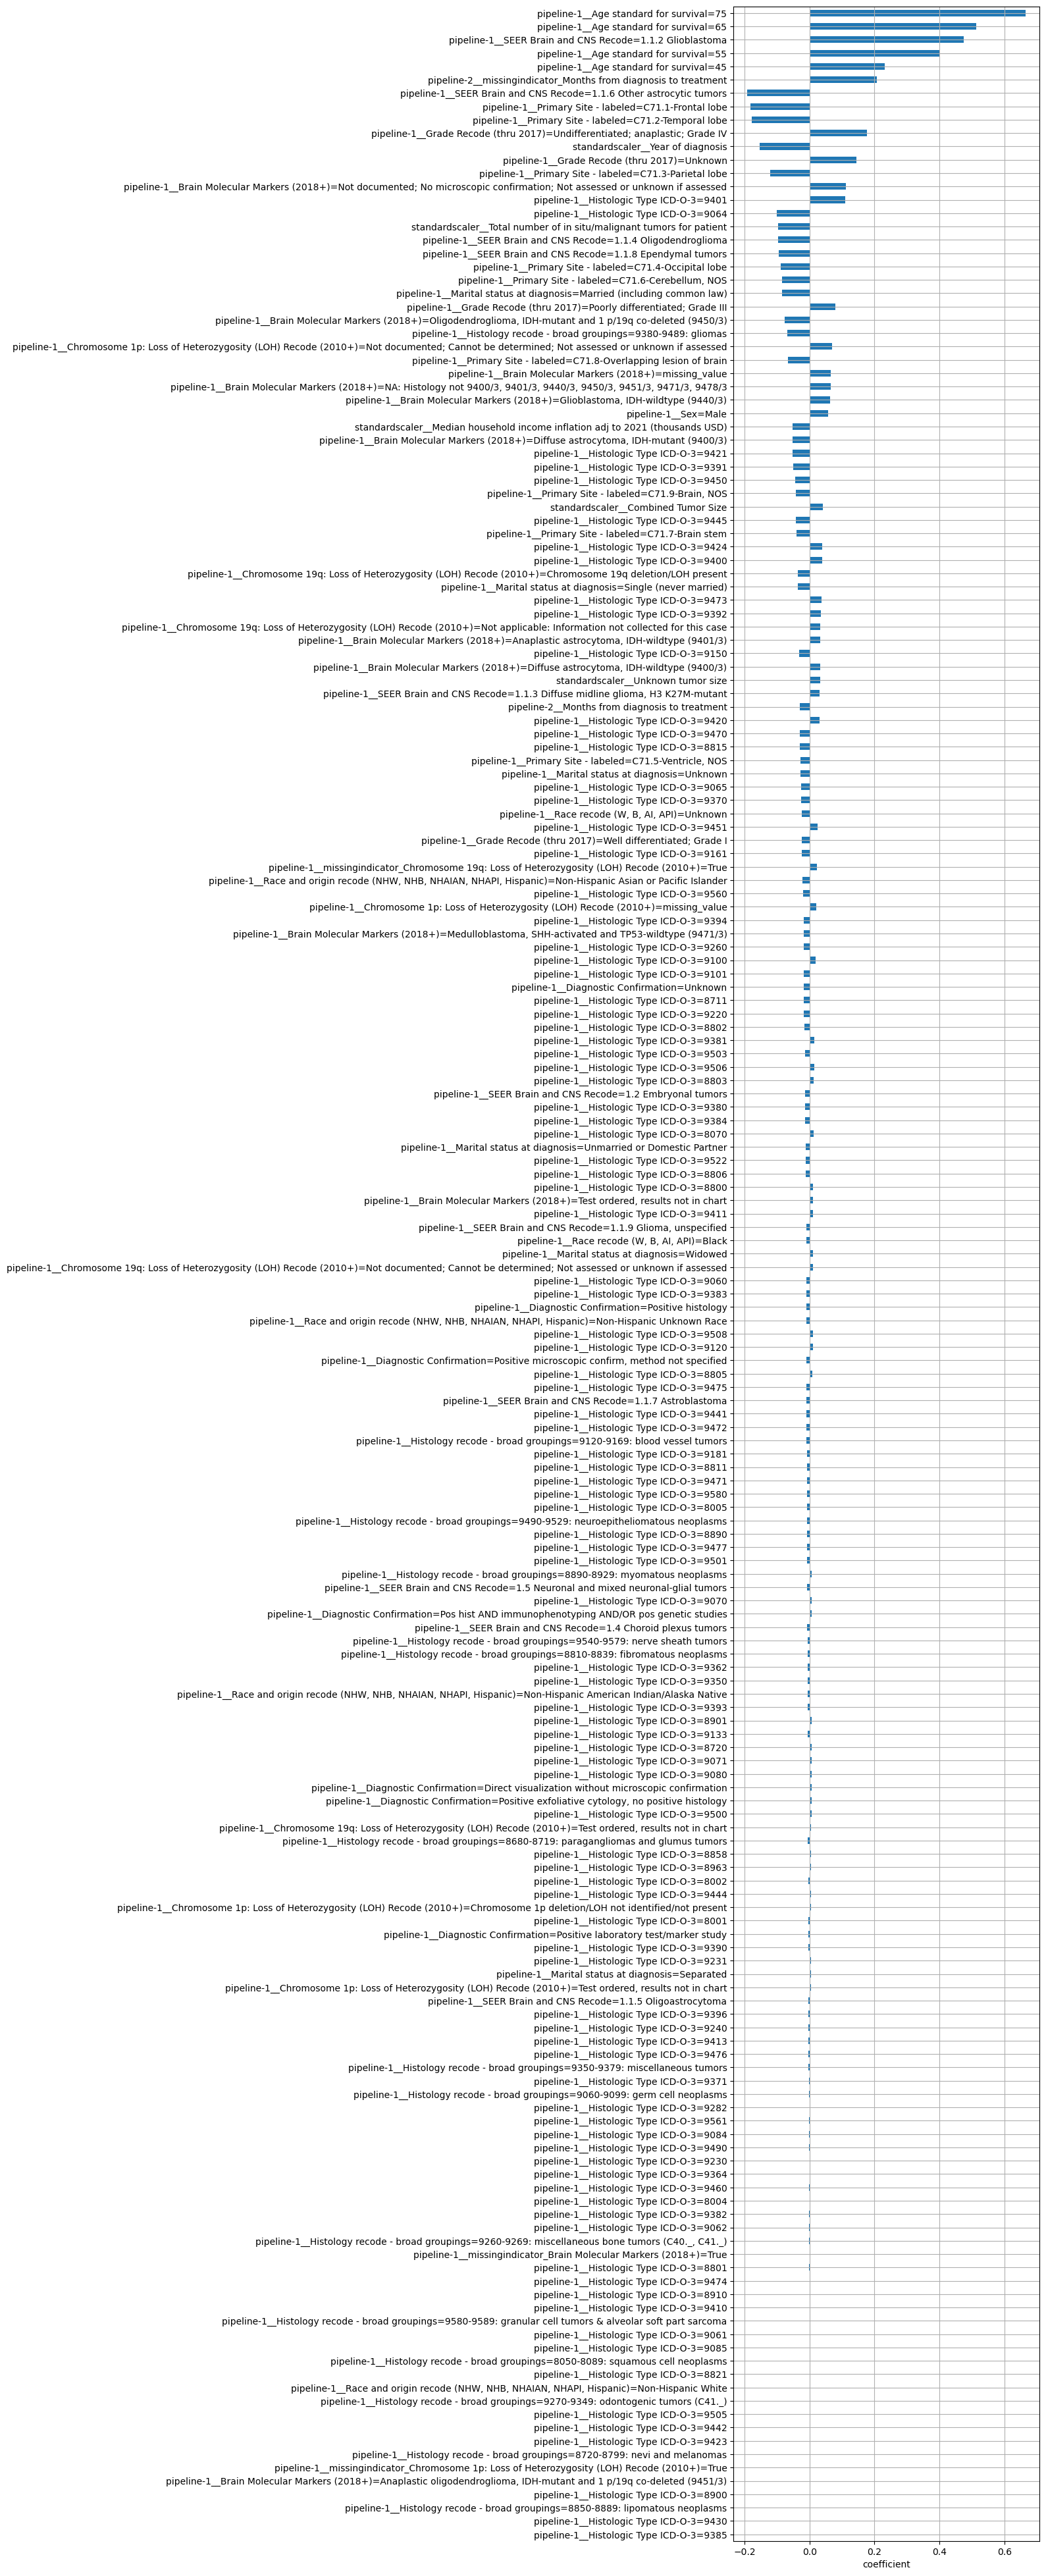

In [207]:
best_model = cv_search_1D.best_estimator_
best_coeffs = pd.DataFrame(best_model.coef_, index=feature_names, columns=['coefficient'])

non_zero = np.sum(best_coeffs.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = best_coeffs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 50))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

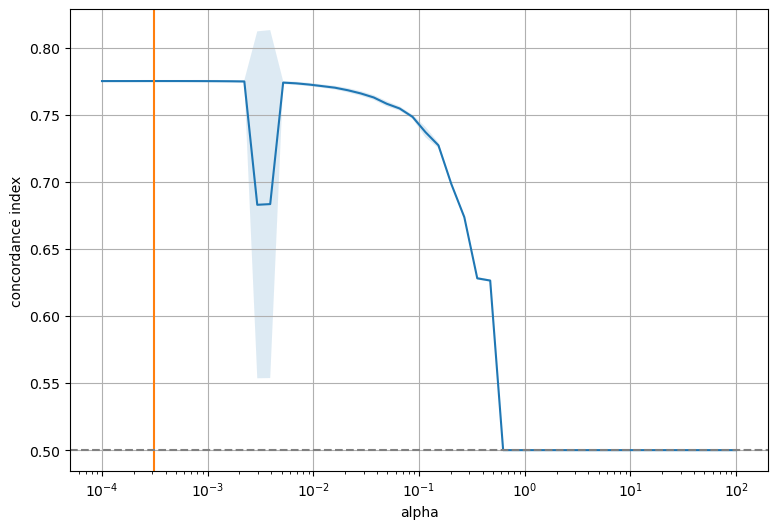

In [208]:
alphas = []
mean = []
std = []
for i, alpha in enumerate(cv_results_1D.param_alphas):
    alphas.append(cv_results_1D.param_alphas[i][0])
    mean.append(cv_results_1D.mean_test_score[i])
    std.append(cv_results_1D.std_test_score[i])

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, np.asarray(mean) - np.asarray(std),
                np.asarray(mean) + np.asarray(std), alpha=0.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(cv_search_1D.best_params_["alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

In [209]:
coxnet_pred = CoxnetSurvivalAnalysis(verbose=True, fit_baseline_model=True)
coxnet_pred.set_params(**cv_search.best_params_)
coxnet_pred.fit(X_transformed, y_train.to_records(index=False))

CoxnetSurvivalAnalysis(alphas=[0.0005179474679231213], fit_baseline_model=True,
                       l1_ratio=0.7857142857142857, verbose=True)

In [210]:
X_train.loc[:, 'Sex']

36640    Female
58939      Male
3662     Female
23396    Female
28036      Male
          ...  
17826      Male
42622      Male
39570      Male
48413      Male
46191      Male
Name: Sex, Length: 61061, dtype: category
Categories (2, object): ['Female', 'Male']

In [211]:
# Why is the scaled and one-hot version so inhomogeneous compared to the original categorical?
idx_male = np.where(feature_names == "pipeline-1__Sex=Male")[0].item()
for Xt, count in np.unique(X_transformed[:, idx_male], return_counts=True):
    print(f'Counts pipeline__Sex=Male = {Xt}: {count}')
print()
print(X_train['Sex'].value_counts())

Counts pipeline__Sex=Male = -1.1457493002312418: 0.8727912814768243
Counts pipeline__Sex=Male = 26402: 34659

Sex
Male      34659
Female    26402
Name: count, dtype: int64


In [212]:
np.unique(X_transformed[:, idx_male], return_counts=True)

(array([-1.1457493 ,  0.87279128]), array([26402, 34659]))

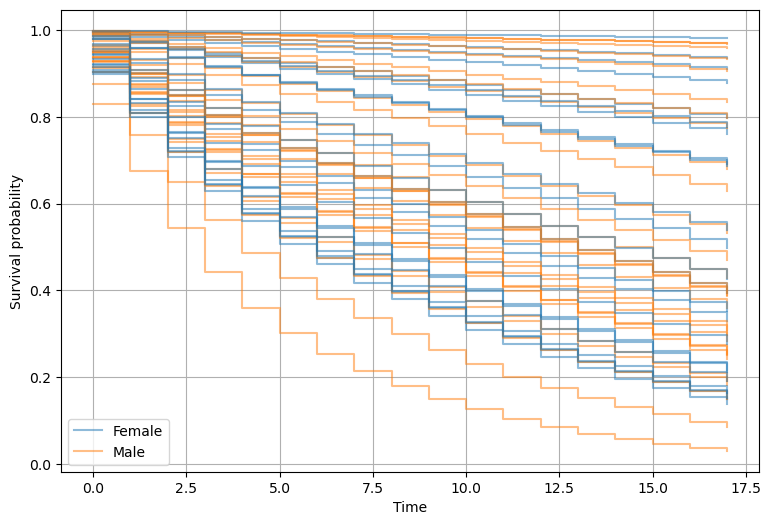

In [213]:
surv_fns = coxnet_pred.predict_survival_function(X_transformed)
idx_male = np.where(feature_names == "pipeline-1__Sex=Male")[0].item()

# Not a priori clear that this is the correct labeling.
# We need to determine which feature maps to which one-hot and rescaled coefficient in general.
coeffs_to_categories = {
    -1: "Female",
    1: "Male",
}

time_points = np.quantile(y_train["Survival months"], np.linspace(0, 0.6, 100))
legend_handles = []
legend_labels = []
_, ax = plt.subplots(figsize=(9, 6))
for i, (fn, scaled_var) in enumerate(zip(surv_fns, X_transformed[:, idx_male])):
    if i > 50:
        break
    vscale = round(scaled_var)
    name = coeffs_to_categories[vscale]
    if vscale == -1:
        label = 0
    else:
        label = 1
    (line,) = ax.step(time_points, fn(time_points),
                      where="post", color=f"C{label}", alpha=0.5)
    if len(legend_handles) < 2:
        legend_labels.append(name)
        legend_handles.append(line)
ax.legend(legend_handles, legend_labels)
ax.set_xlabel("Time")
ax.set_ylabel("Survival probability")
ax.grid(True)